In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploracion de datos

In [2]:
df = pd.read_csv('final_data.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1


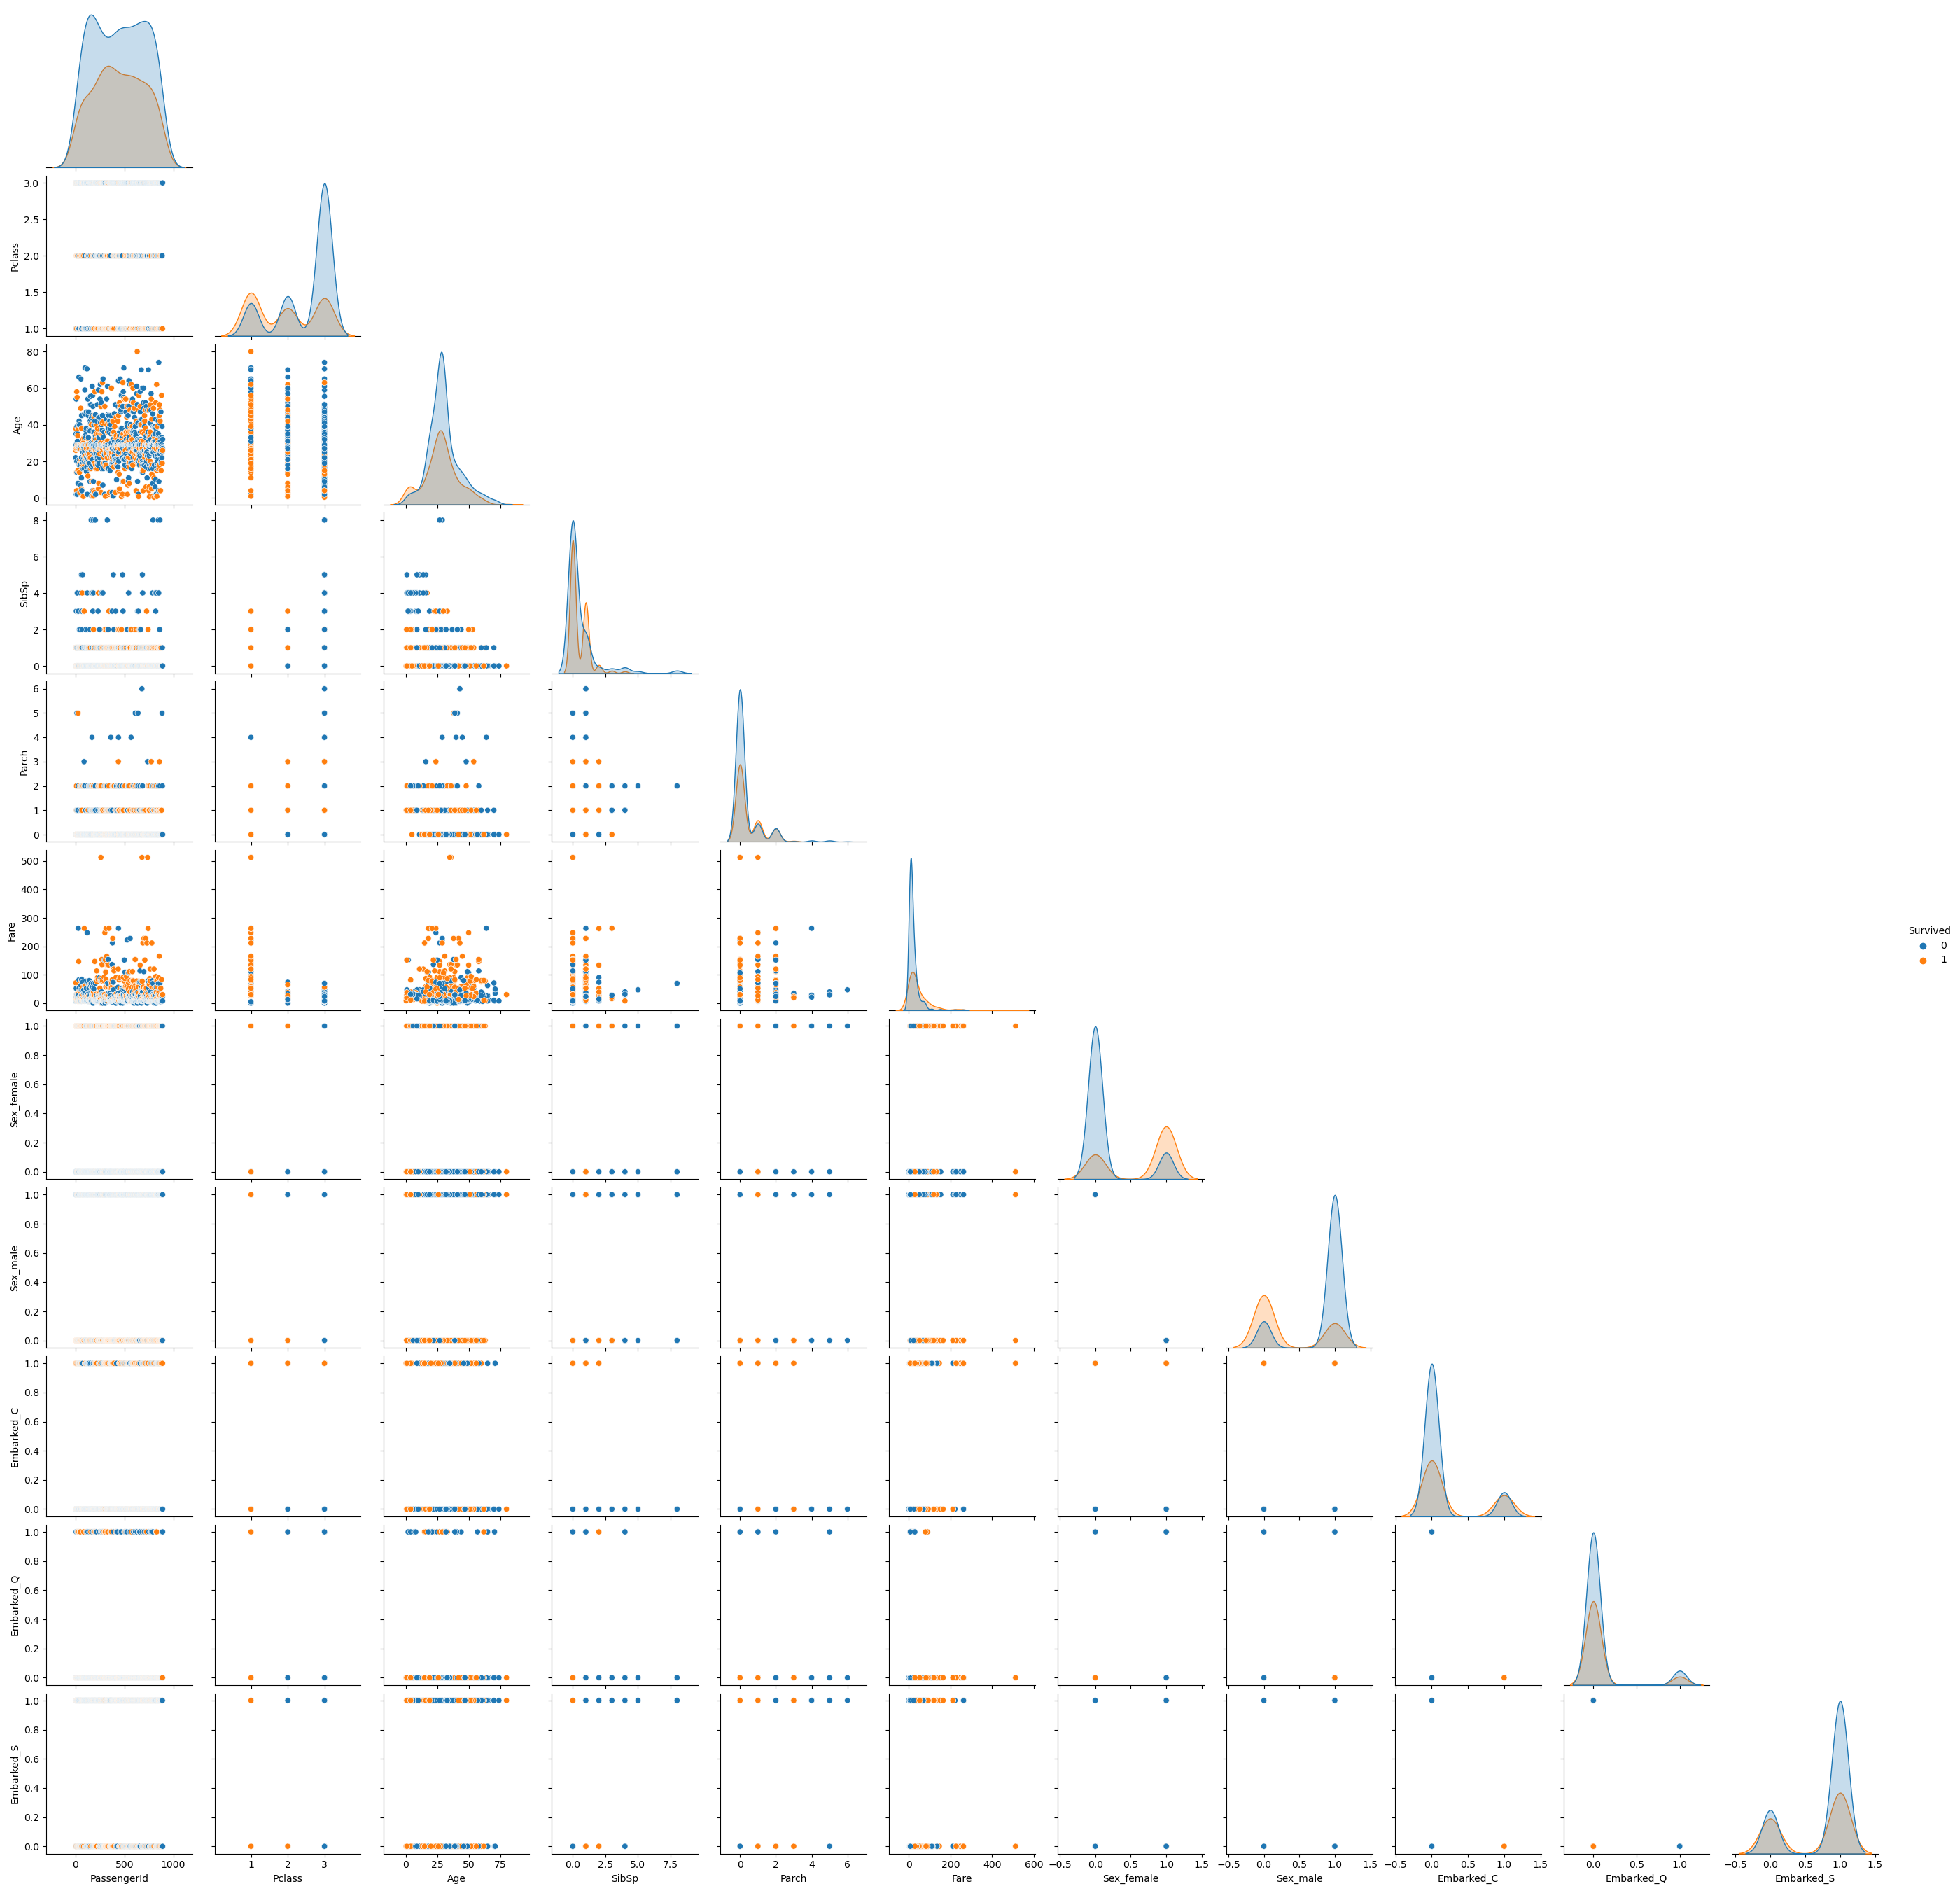

In [4]:
sns.pairplot(df, hue='Survived', corner=True)
plt.show()

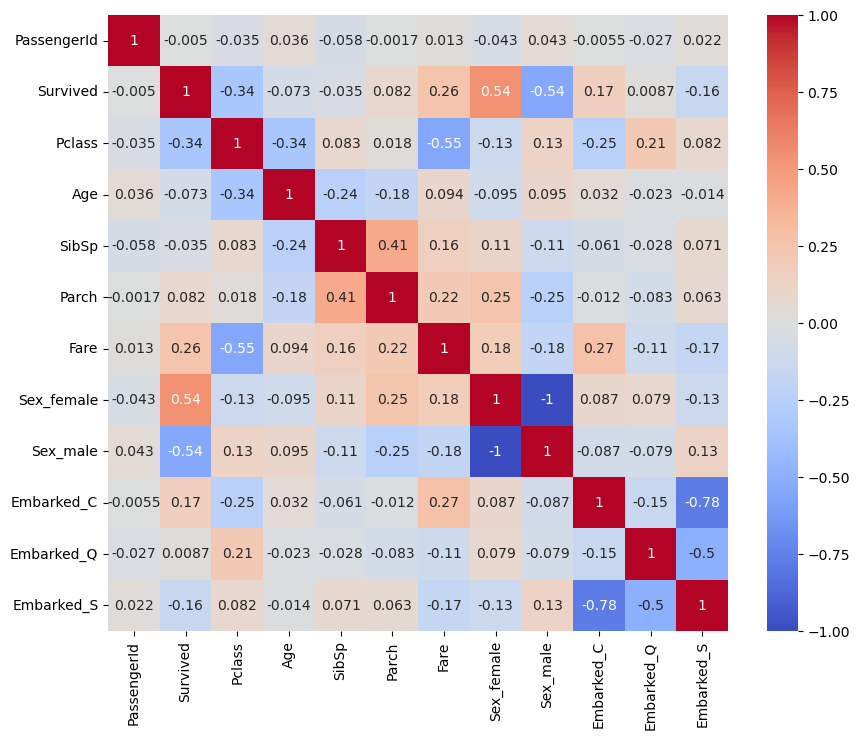

In [5]:
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

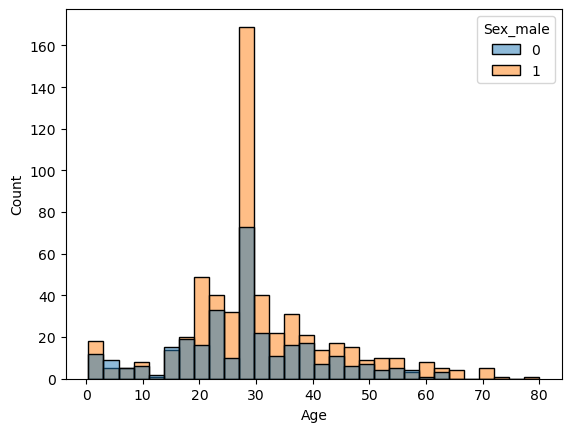

In [6]:
sns.histplot(df, x='Age', hue='Sex_male')
plt.show()

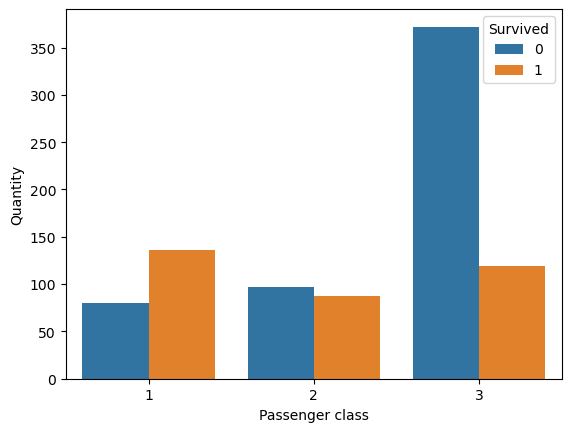

In [19]:
sns.countplot(data = df, x='Pclass', hue='Survived')
plt.xlabel('Passenger class')
plt.ylabel('Quantity')
plt.show()

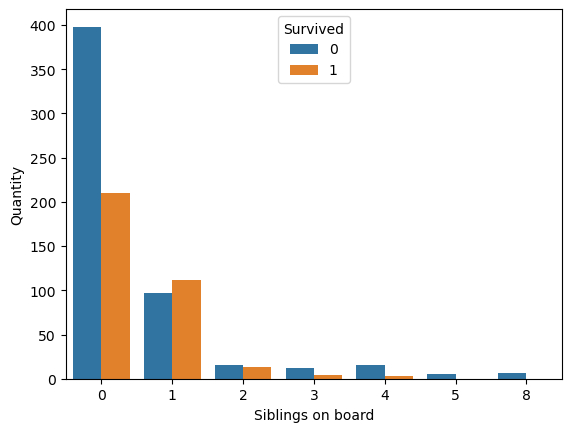

In [20]:
sns.countplot(data = df, x='SibSp', hue='Survived')
plt.xlabel('Siblings on board')
plt.ylabel('Quantity')
plt.show()

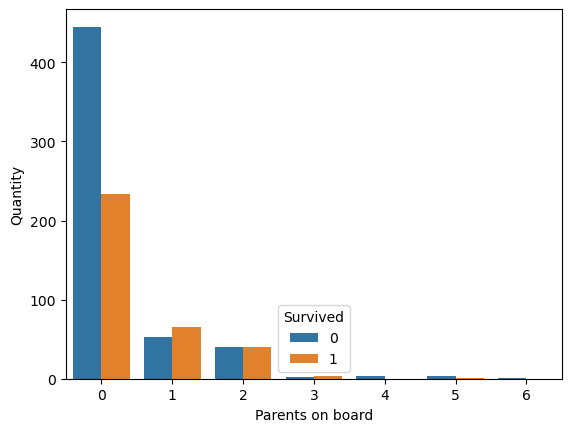

In [22]:
sns.countplot(data = df, x='Parch', hue='Survived')
plt.xlabel('Parents on board')
plt.ylabel('Quantity')
plt.show()

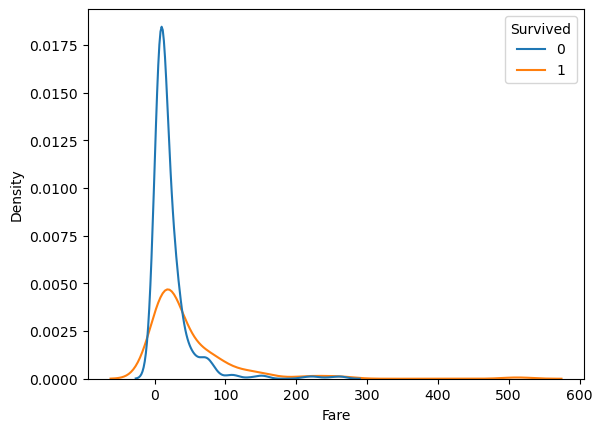

In [29]:
sns.kdeplot(df['Fare'], hue=df['Survived'])
plt.show()

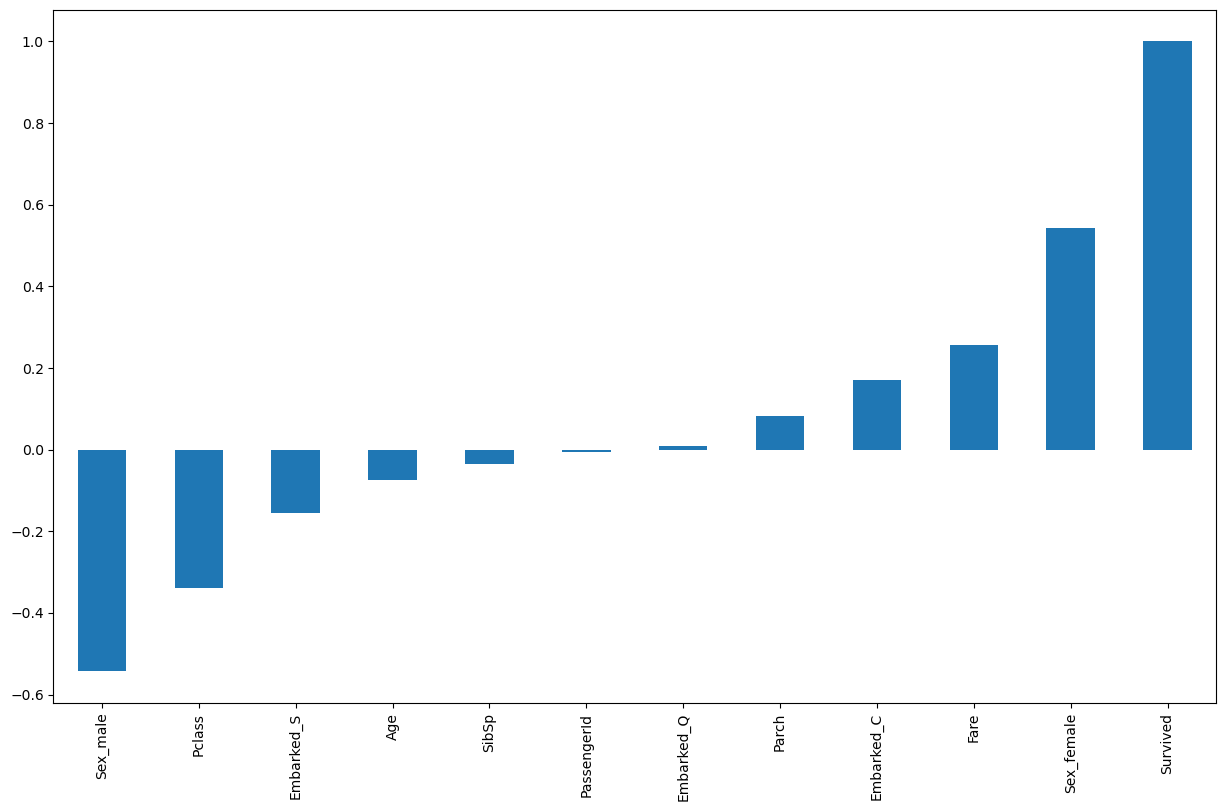

In [49]:
fig = plt.figure(figsize=(15,9))
df.corr()['Survived'].sort_values(ascending=True).plot(kind='bar')
plt.show()

## Modelos ML

En esta sección se desarrollan los modelos de machine learning, intentando predecir si una persona abordo del Titanic ¿sobrevivirá o no?. El modelo es entrenado con los datos del fatal accidente.

#### Logistic Regression - Sin escalar Datos

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [33]:
X = df.drop(['PassengerId', 'Survived'], axis=1)
y = df.Survived

In [34]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [35]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [39]:
X_train.shape

(668, 10)

In [40]:
y_train.shape

(668,)

In [41]:
X_test.shape

(223, 10)

In [42]:
y_test.shape

(223,)

In [43]:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

C:\Users\Dduqu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [67]:
pred = LogReg.predict(X_test)
train_pred = LogReg.predict(X_train)

In [50]:
#Matriz de confusión
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, pred)
cm

array([[115,  19],
       [ 25,  64]], dtype=int64)

In [68]:
cm_train = confusion_matrix(y_train, train_pred)
cm_train

array([[359,  56],
       [ 77, 176]], dtype=int64)

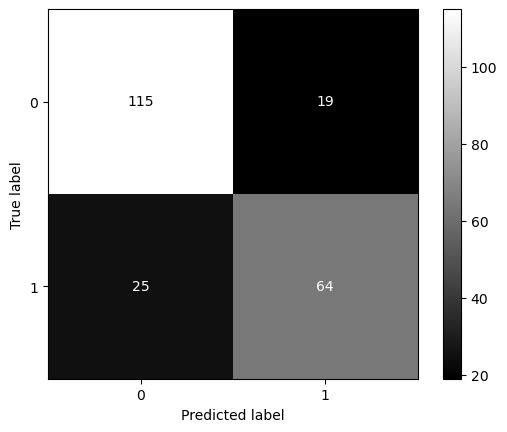

In [51]:
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = LogReg.classes_)
disp.plot(cmap = 'gray')
plt.show()

In [52]:
from sklearn import metrics

In [69]:
acc = round(metrics.accuracy_score(y_test, pred),4)*100
acc_train = round(metrics.accuracy_score(y_train, train_pred),4)*100
print(f'El accuracy del modelo (train) es: {acc_train}%')
print(f'El accuracy del modelo (test) es: {acc}%')

El accuracy del modelo (train) es: 80.08999999999999%
El accuracy del modelo (test) es: 80.27%


#### Logistic Regression - Escalando datos

In [54]:
from sklearn.preprocessing import MinMaxScaler

In [57]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled)
X_scaled.columns = X.columns
X_scaled.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1.0,0.271174,0.125,0.0,0.014151,0.0,1.0,0.0,0.0,1.0
1,0.0,0.472229,0.125,0.0,0.139136,1.0,0.0,1.0,0.0,0.0
2,1.0,0.321438,0.000,0.0,0.015469,1.0,0.0,0.0,0.0,1.0
3,0.0,0.434531,0.125,0.0,0.103644,1.0,0.0,0.0,0.0,1.0
4,1.0,0.434531,0.000,0.0,0.015713,0.0,1.0,0.0,0.0,1.0


In [58]:
X_sc_train, X_sc_test, y_sc_train, y_sc_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

In [71]:
LR_scaled = LogisticRegression()
LR_scaled.fit(X_sc_train, y_train)

LogisticRegression()

In [73]:
pred1 = LR_scaled.predict(X_sc_test)
pred1_train = LR_scaled.predict(X_sc_train)

In [63]:
cm1 = confusion_matrix(y_sc_test, pred1)
cm1

array([[111,  23],
       [ 25,  64]], dtype=int64)

In [74]:
cm1_train = confusion_matrix(y_sc_train, pred1_train)
cm1_train

array([[357,  58],
       [ 75, 178]], dtype=int64)

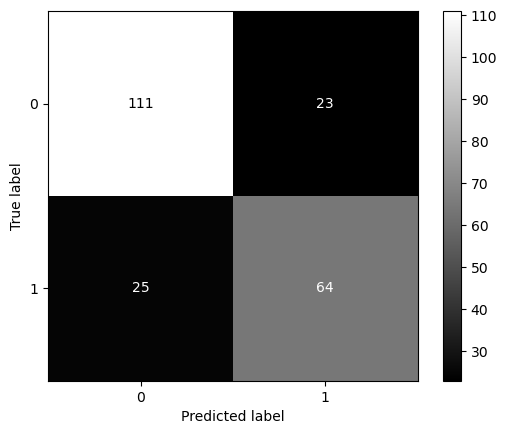

In [64]:
disp = ConfusionMatrixDisplay(confusion_matrix = cm1, display_labels = LR_scaled.classes_)
disp.plot(cmap = 'gray')
plt.show()

In [75]:
acc_sc = round(metrics.accuracy_score(y_sc_test, pred1),4)*100
acc_sc_train = round(metrics.accuracy_score(y_sc_train, pred1_train),4)*100
print(f'El accuracy del modelo (datos escalados - test) es: {acc_sc}%')
print(f'El accuracy del modelo (datos escalados - train) es: {acc_sc_train}%')

El accuracy del modelo (datos escalados - test) es: 78.48%
El accuracy del modelo (datos escalados - train) es: 80.08999999999999%


### Arboles de decisión y random forest

#### Random forest

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [76]:
rf = RandomForestClassifier(n_estimators = 10, random_state = 42)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [77]:
rf_pred_train = rf.predict(X_train)
rf_pred_test = rf.predict(X_test)

In [78]:
train_accuracy = metrics.accuracy_score(y_train, rf_pred_train)
test_accuracy = metrics.accuracy_score(y_test, rf_pred_test)

print(f'El accuracy del train es: {train_accuracy}')
print(f'El accuracy del test es: {test_accuracy}')

El accuracy del train es: 0.968562874251497
El accuracy del test es: 0.7757847533632287


In [79]:
rf_sc = RandomForestClassifier(n_estimators = 10, random_state = 42)
rf_sc.fit(X_sc_train, y_sc_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [80]:
rf_sc_pred_train = rf_sc.predict(X_sc_train)
rf_sc_pred_test = rf_sc.predict(X_sc_test)

train_sc_accuracy = metrics.accuracy_score(y_sc_train, rf_sc_pred_train)
test_sc_accuracy = metrics.accuracy_score(y_sc_test, rf_sc_pred_test)

print(f'El accuracy del train es: {train_sc_accuracy}')
print(f'El accuracy del test es: {test_sc_accuracy}')

El accuracy del train es: 0.968562874251497
El accuracy del test es: 0.7757847533632287


### Predicción final

Todos los modelos tuvieron un desempeño similar, cercano al ~75% - 80%. Sin embargo, el mejor desempeño fue el de regresión logística sin escalar los datos, se trabajará con ese modelo.

In [97]:
df_test = pd.read_csv('./titanic/test.csv')

In [98]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [99]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [100]:
df_test = df_test.drop(['Name','Ticket','Cabin'], axis = 1)
df_test = df_test.ffill(axis=0)
df_test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [101]:
df_test = pd.get_dummies(df_test, columns = ['Sex', 'Embarked'])


In [102]:
df_test.head()
PassId = df_test.PassengerId
df_test = df_test.drop(['PassengerId'], axis=1)
PassId

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [108]:
pass_id = PassId.values

In [105]:
survive = LogReg.predict(df_test)

In [109]:
survivors_df = pd.DataFrame({'PassengerId':pass_id, 'Survived':survive})
survivors_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [110]:
survivors_df['Survived'].value_counts()

0    263
1    155
Name: Survived, dtype: int64